# Trying to install XGBoost
## Use Scikit-learning Decision Tree and XGBoost

In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import xgboost as xgb
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [2]:
from sklearn import tree
from sklearn.model_selection import train_test_split

# Load Diabetes Data
### Data Reference : IBM Coursera Deep-learning and Reinforcement learning Course week 2 Material.
https://www.coursera.org/learn/deep-learning-reinforcement-learning/supplement/sABhA/keras-demo-activity

In [3]:
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin", 
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv('diabetes.csv', names=names, header=0)

In [4]:
diabetes_df

,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
x = diabetes_df.iloc[:, :-1].values
y = diabetes_df.has_diabetes.values

## Visualize the distributions of each variables.

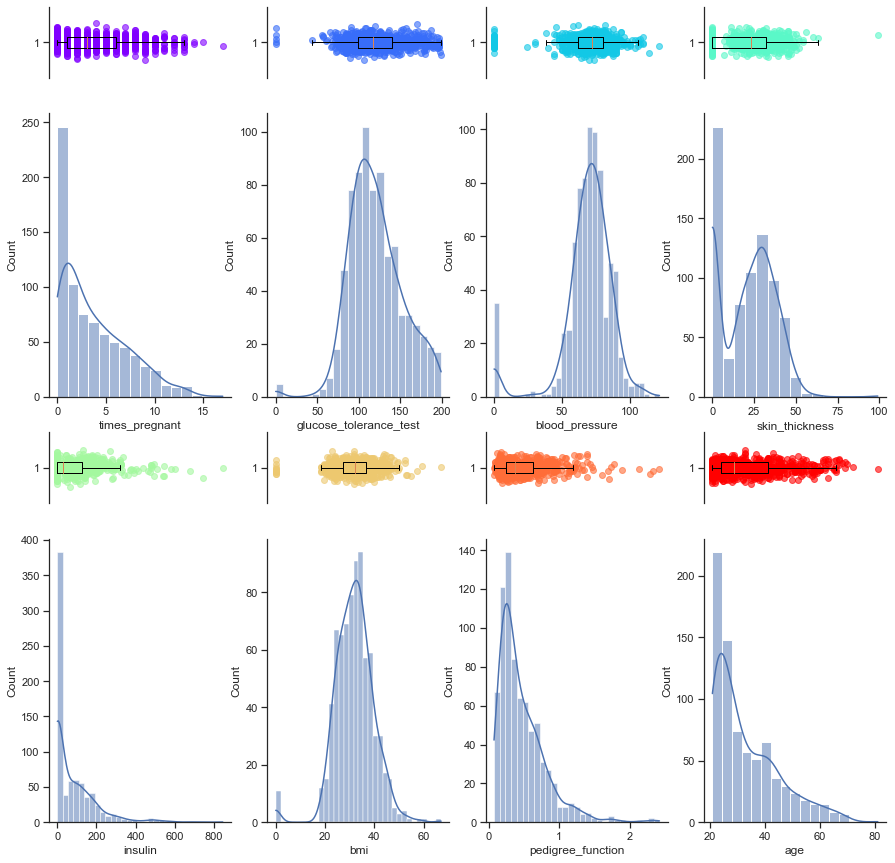

In [217]:
clevels = np.linspace(0., 1., 8)
f, axs = plt.subplots(4,4, sharex=False,  gridspec_kw={"height_ratios":(.1,.4, 0.1, 0.4)})
plt.subplots_adjust(hspace=0.2)
f.set_figheight(15)
f.set_figwidth(15)
sns.set(style="ticks")
for i in range(8):
    xpos = np.random.normal(1, 0.08, x[:,i].shape)
    axs[np.int(np.floor(i/4)*2),np.int(np.mod(i,4))].boxplot(x[:,i],showfliers=False,vert=False)
    axs[np.int(np.floor(i/4)*2),np.int(np.mod(i,4))].scatter(x[:,i],xpos ,c=cm.rainbow([clevels[i]]), alpha=0.6 )
    axs[np.int(np.floor(i/4)*2),np.int(np.mod(i,4))].set(xticks=[])
    axs[np.int(np.floor(i/4)*2),np.int(np.mod(i,4))].spines.right.set_visible(False)
    axs[np.int(np.floor(i/4)*2),np.int(np.mod(i,4))].spines.top.set_visible(False)
    axs[np.int(np.floor(i/4)*2),np.int(np.mod(i,4))].spines.bottom.set_visible(False)
    sns.histplot(data=x[:,i], ax=axs[np.int(np.floor(i/4)*2)+1,np.int(np.mod(i,4))],kde=True)
    axs[np.int(np.floor(i/4)*2)+1,np.int(np.mod(i,4))].set_xlabel(names[i])
    axs[np.int(np.floor(i/4)*2)+1,np.int(np.mod(i,4))].spines.top.set_visible(False)
    axs[np.int(np.floor(i/4)*2)+1,np.int(np.mod(i,4))].spines.right.set_visible(False)

In [188]:
axs[1,2].get_xlim()

(-6.1, 128.1)

In [145]:
np.floor(i/4)*2+1

1.0

In [8]:
xTrain, xTest,yTrain, yTest = train_test_split(x,y,test_size=0.2)

In [9]:
( xTrain.shape, xTest.shape, yTrain.shape,yTest.shape)

((614, 8), (154, 8), (614,), (154,))

# Compare XGBoost and sklearn tree algoritm

### Sklearn Decision Tree Algorithm.

In [10]:
dtClassifier =  tree.DecisionTreeClassifier()
dtClassifier.fit(xTrain, yTrain)
dtYPred = dtClassifier.predict(xTest)

accuracy = np.sum(yTest == dtYPred)/len(yTest)
accuracy

0.7012987012987013

### XGBoost

In [11]:
dataTrain = xgb.DMatrix(xTrain, label=yTrain)
dataTest = xgb.DMatrix(xTest, label=yTest)

param = {
    'eta': 0.3, 
    'max_depth': 6,
    'objective':'multi:softprob',
    'num_class':2}
steps = 40

model = xgb.train(param, dataTrain, steps)
xgYPred = model.predict(dataTest)
bestXGYPred = np.asarray([np.argmax(line) for line in xgYPred])


[15:03:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [12]:
np.sum(yTest == bestXGYPred)/len(yTest)

0.7662337662337663

In [16]:
print("Decision Tree Precision = {}".format(precision_score(yTest, dtYPred, average='macro')))
print("XGBoost Precisioin = {}".format(precision_score(yTest, bestXGYPred, average='macro')))
print("Decision Tree Recall = {}".format(recall_score(yTest, dtYPred, average='macro')))
print("XGBoost Recall = {}".format(recall_score(yTest, bestXGYPred, average='macro')))
print("Decision Tree Accuracy = {}".format(accuracy_score(yTest, dtYPred)))
print("XGBoost Accuracy = {}".format(accuracy_score(yTest, bestXGYPred)))

Decision Tree Precision = 0.6957692307692308
XGBoost Precisioin = 0.7613146551724138
Decision Tree Recall = 0.6767361111111111
XGBoost Recall = 0.7526041666666667
Decision Tree Accuracy = 0.7012987012987013
XGBoost Accuracy = 0.7662337662337663


# Visualize Pair-wise Decision Boundary
### Scikit Leearn Decision Tree Boundary

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(-1.0, 67.99999999999999, 20.0, 81.90000000000089)

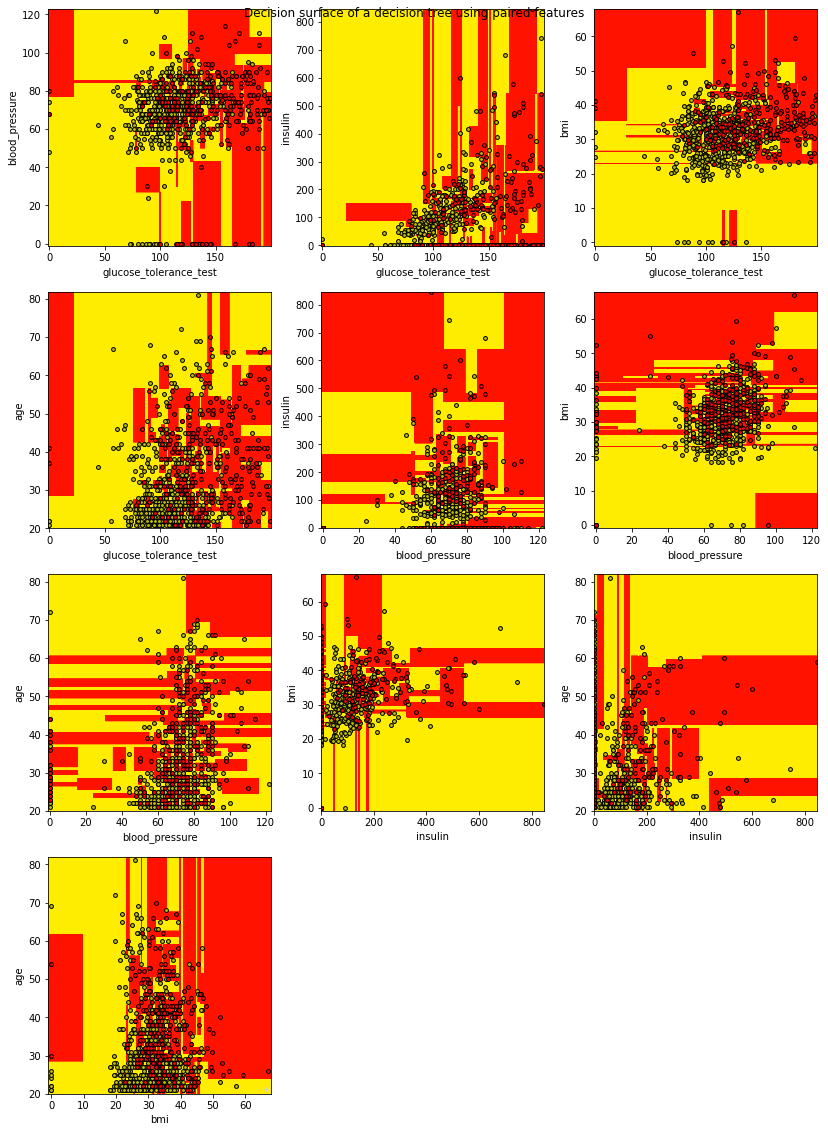

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

n_classes = 2
plot_colors = "yr"
plot_step = 0.1
plt.figure(figsize=(12, 16))
for pairidx, pair in enumerate([[1,2],[1,4],[1,5], [1,7],[2,4],[2,5],[2,7],[4,5],[4,7],[5,7]]):
    xTemp = x[:, pair]
    yTemp = y
    
    clf = tree.DecisionTreeClassifier().fit(xTemp, yTemp)
    plt.subplot(4,3, pairidx+1)
    
    x_min, x_max = xTemp[:,0].min()-1, xTemp[:,0].max()+1
    y_min, y_max = xTemp[:,1].min()-1, xTemp[:,1].max()+1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=1, w_pad=1, pad=2.5)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    cs = plt.contourf(xx,yy,Z, cmap=plt.cm.autumn_r)
    plt.xlabel(names[pair[0]])
    plt.ylabel(names[pair[1]])
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(yTemp==i)
        plt.scatter(
            xTemp[idx, 0],
            xTemp[idx, 1],
            c=color,
            cmap=plt.cm.autumn_r,
            edgecolor="black",
            s=15,
        )
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc="lower right",borderpad=0, handletextpad=0)
plt.axis("tight")

### XGBoost Decision Boundary

[19:01:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:01:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:01:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:02:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(-1.0, 67.99999999999999, 20.0, 81.90000000000089)

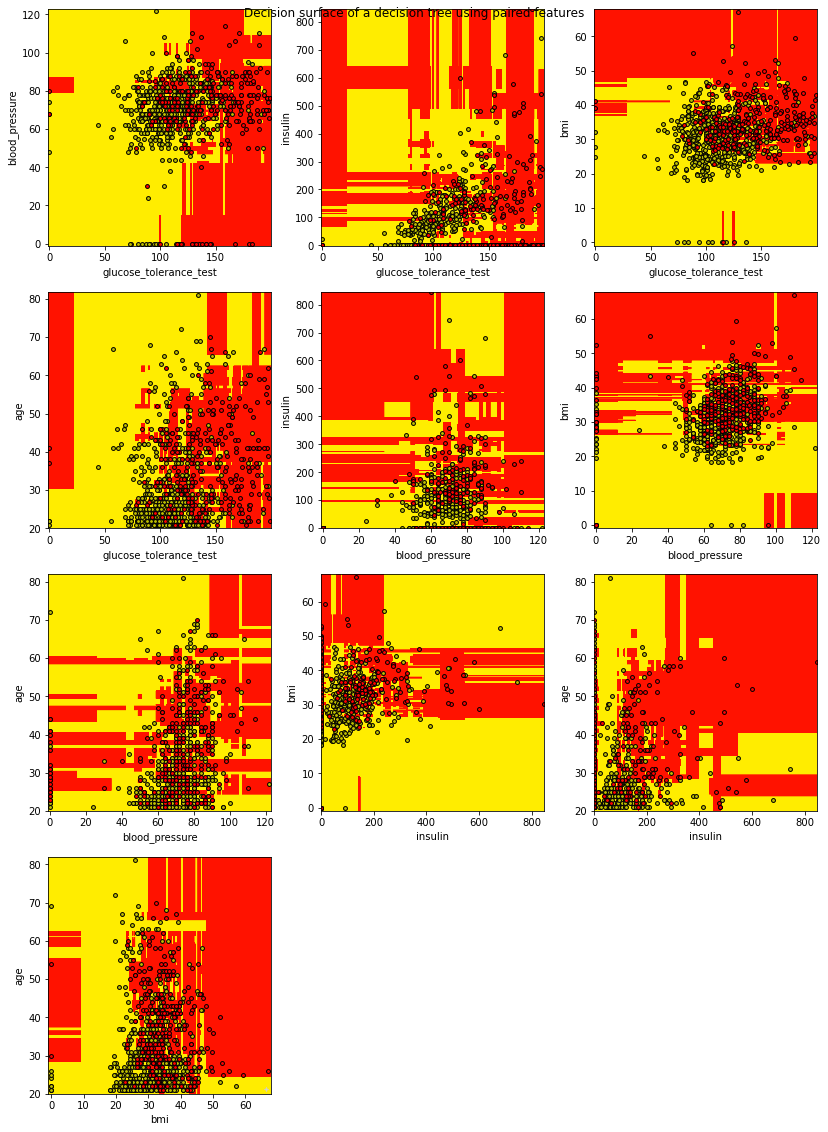

In [58]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

param = {
    'eta': 0.3, 
    'max_depth': 6,
    'objective':'multi:softprob',
    'num_class':2}
steps = 40

n_classes = 2
plot_colors = "yr"
plot_step = 0.1
plt.figure(figsize=(12, 16))
for pairidx, pair in enumerate([[1,2],[1,4],[1,5], [1,7],[2,4],[2,5],[2,7],[4,5],[4,7],[5,7]]):
    xTemp = x[:, pair]
    yTemp = y
    
    dataTemp = xgb.DMatrix(xTemp, label=yTemp)
    model = xgb.train(param, dataTemp, steps)

    plt.subplot(4,3, pairidx+1)
    
    x_min, x_max = xTemp[:,0].min()-1, xTemp[:,0].max()+1
    y_min, y_max = xTemp[:,1].min()-1, xTemp[:,1].max()+1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=1, w_pad=1, pad=2.5)
    
    Z = model.predict(xgb.DMatrix(np.c_[xx.ravel(), yy.ravel()]))
    Z = np.asarray([np.argmax(line) for line in Z])
    Z = Z.reshape(xx.shape)
    
    cs = plt.contourf(xx,yy,Z, cmap=plt.cm.autumn_r)
    plt.xlabel(names[pair[0]])
    plt.ylabel(names[pair[1]])
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(yTemp==i)
        plt.scatter(
            xTemp[idx, 0],
            xTemp[idx, 1],
            c=color,
            cmap=plt.cm.autumn_r,
            edgecolor="black",
            s=15,
        )
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc="lower right",borderpad=0, handletextpad=0)
plt.axis("tight")

# Visualization of Scikit-learning Decision Tree Structure

In [59]:
# import graphviz
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
#dot_data = tree.export_graphviz(dtClassifier, out_file=None)
#graph = graphviz.Source(dot_data)
##graph.render("Diabetes")
print(export_text(dtClassifier, feature_names=names[0:8]))

|--- glucose_tolerance_test <= 127.50
|   |--- age <= 28.50
|   |   |--- bmi <= 49.05
|   |   |   |--- bmi <= 30.95
|   |   |   |   |--- times_pregnant <= 7.50
|   |   |   |   |   |--- pedigree_function <= 0.67
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- pedigree_function >  0.67
|   |   |   |   |   |   |--- pedigree_function <= 0.70
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- pedigree_function >  0.70
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- times_pregnant >  7.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- bmi >  30.95
|   |   |   |   |--- pedigree_function <= 0.50
|   |   |   |   |   |--- bmi <= 31.10
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- bmi >  31.10
|   |   |   |   |   |   |--- skin_thickness <= 8.00
|   |   |   |   |   |   |   |--- glucose_tolerance_test <= 109.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- glucose_tolerance_test >  109.50
|   |  

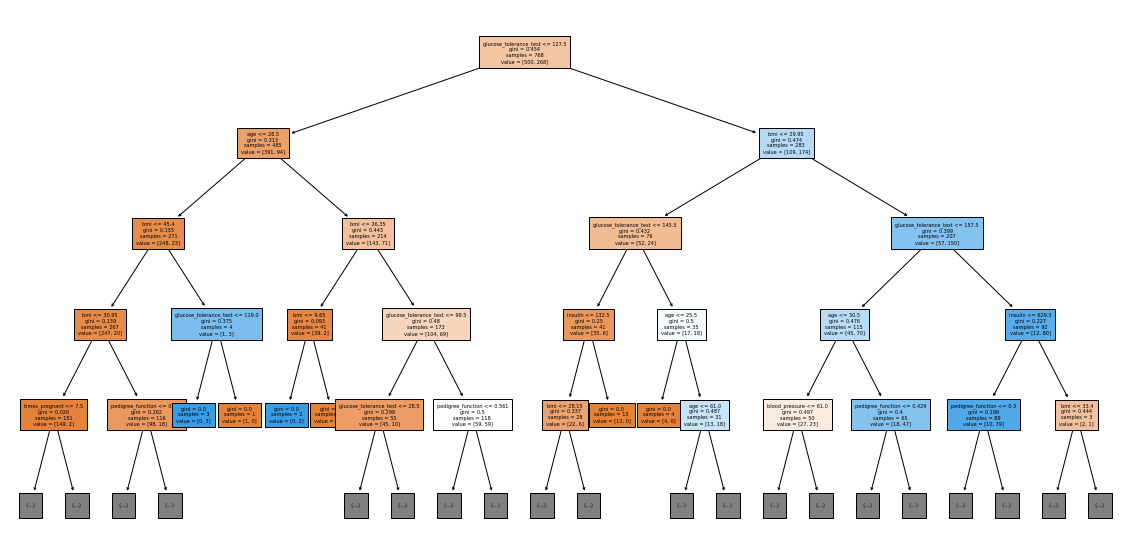

In [60]:
plt.figure(figsize=(20, 10))
clf = tree.DecisionTreeClassifier().fit(x,y)
plot_tree(clf, filled=True, feature_names=names[0:8],max_depth=4,fontsize=5)
plt.show()